
# Trabajo Práctico 2

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import model_selection
from sklearn.decomposition import PCA

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [194]:
cols = ['age',
        'sex',
        'cp',
        'trestbps',
        'chol',
        'fbs',
        'restecg',
        'thalach',
        'exang',
        'oldpeak',
        'slope',
        'ca',
        'thal',
        'num']
data = pd.read_csv('./data/heart_disease/processed.cleveland.data',
                           delimiter=',',
                           header=0,
                           names = cols
                        )

In [195]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [196]:
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

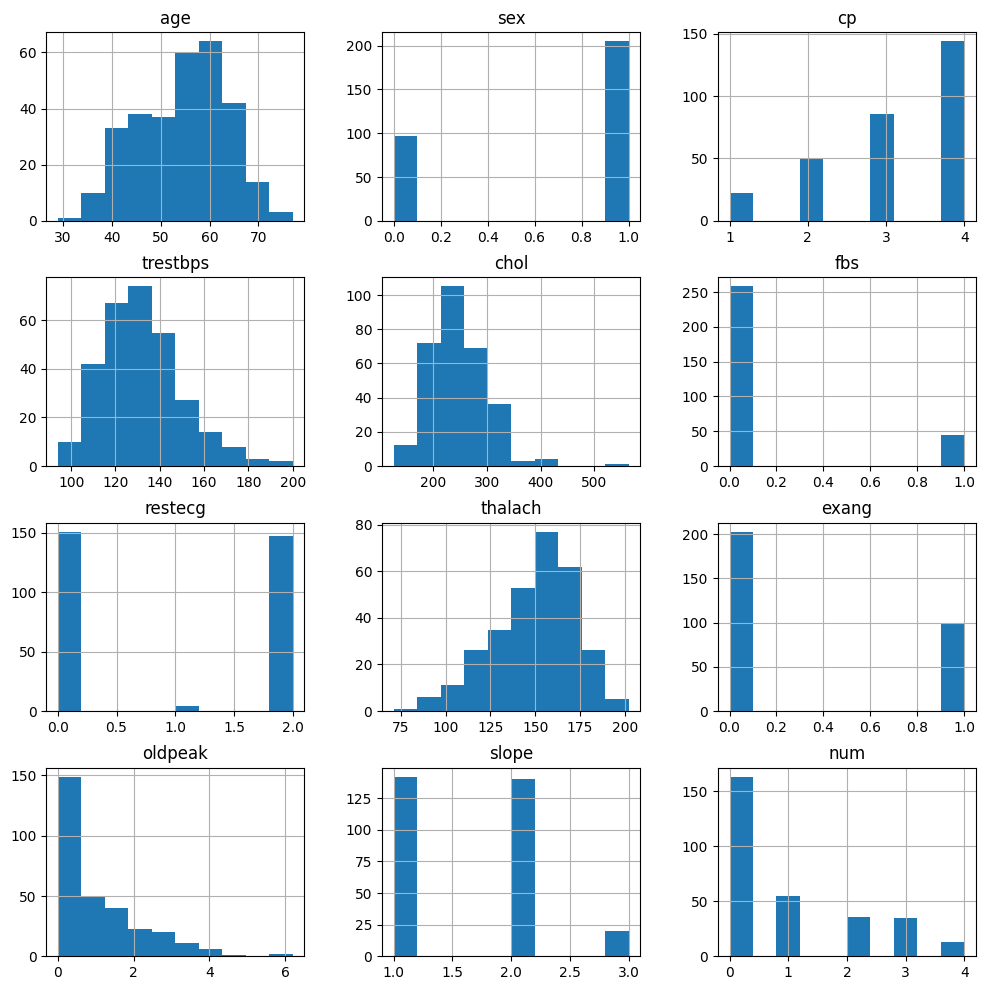

In [197]:
data.hist(figsize = (12, 12))
plt.show()

# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

In [198]:
data = data.replace('?', np.nan)
data["num"].replace(to_replace=[1,2,3,4],value=1,inplace=True)

X = np.array(data.drop(['num'], 1))
y = np.array(data['num'])

/var/folders/ws/7xr4y3vn2nv3l2gxgwhk4y4r0000gn/T/ipykernel_26189/2314460077.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop(['num'], 1))


In [199]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imp = imp.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imp)

In [200]:
pca = PCA(n_components=0.8)
X_pca = pca.fit_transform(X_scaled)

print('Cantidad de componentes necesarios')
print(X_pca.shape[1])

Cantidad de componentes necesarios
8


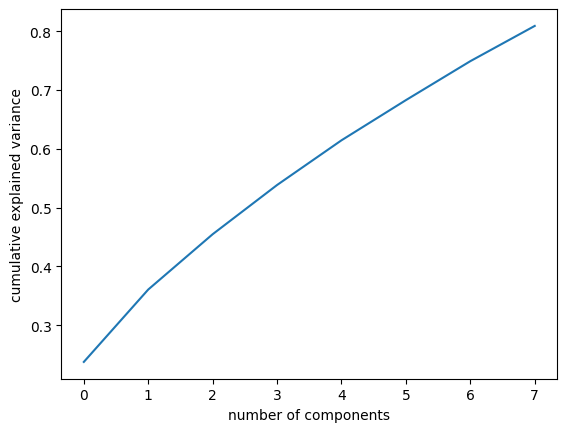

In [201]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [202]:
from sklearn.linear_model import ElasticNet, ElasticNetCV, LogisticRegression, LogisticRegressionCV, SGDClassifier, SGDRegressor
from sklearn.metrics import classification_report, mean_squared_error,mean_absolute_error

results = []

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_pca, y, test_size = 0.2, shuffle = True)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (241, 8)
The shape of X_test is        (61, 8)
The shape of y_train is       (241,)
The shape of y_test is        (61,)


Score : 0.11198366822853578
Mean Squared Error : 0.2219444204642466
Mean Absolute Error : 0.4669886631423568


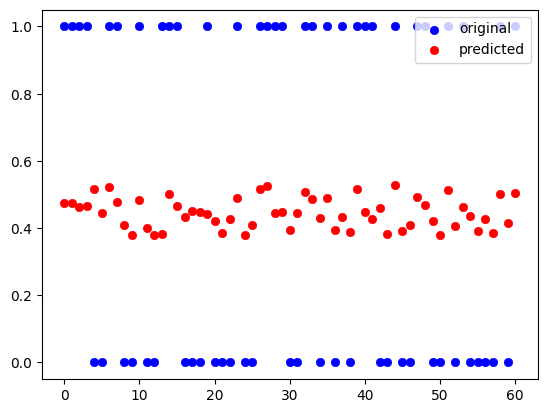

In [203]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)

y_pred = elastic_net.predict(X_test)

score = elastic_net.score(X_test, y_test)
print('Score :', score)
squared_error = mean_squared_error(y_test, y_pred)
print('Mean Squared Error :',squared_error)
absolute_error = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error :',absolute_error)
results.append({'name': 'ElasticNet', 'score': score, 'SquaredError': squared_error, 'AbsoluteError': absolute_error})
x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, lw=0.5, color="blue", label="original")
plt.scatter(x_ax, y_pred, lw=0.5, color="red", label="predicted")
plt.legend()
plt.show()

Score : 0.4526259149420988
Mean Squared Error : 0.13680674525768557
Mean Absolute Error : 0.3167828623543854


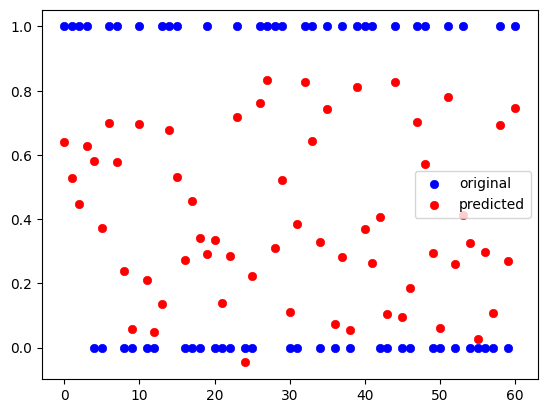

In [204]:
elastic_net_cv = ElasticNetCV(cv=10)
elastic_net_cv.fit(X_train, y_train)

y_pred = elastic_net_cv.predict(X_test)

score = elastic_net_cv.score(X_test, y_test)
print('Score :', score)
squared_error = mean_squared_error(y_test, y_pred)
print('Mean Squared Error :',squared_error)
absolute_error = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error :',absolute_error)
results.append({'name': 'ElasticNetCV', 'score': score, 'SquaredError': squared_error, 'AbsoluteError': absolute_error})
x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, lw=0.5, color="blue", label="original")
plt.scatter(x_ax, y_pred, lw=0.5, color="red", label="predicted")
plt.legend()
plt.show()

Score : 0.8360655737704918
Mean Squared Error : 0.16393442622950818
Mean Absolute Error : 0.16393442622950818


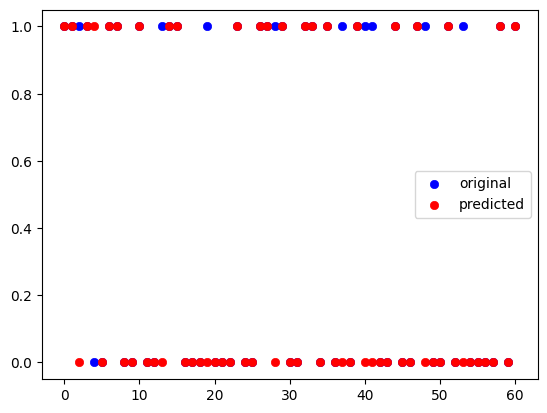

              precision    recall  f1-score   support

           0       0.77      0.97      0.86        31
           1       0.95      0.70      0.81        30

    accuracy                           0.84        61
   macro avg       0.86      0.83      0.83        61
weighted avg       0.86      0.84      0.83        61



In [205]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)

score = logistic_regression.score(X_test, y_test)
print('Score :', score)
squared_error = mean_squared_error(y_test, y_pred)
print('Mean Squared Error :',squared_error)
absolute_error = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error :',absolute_error)
results.append({'name': 'LogisticRegression', 'score': score, 'SquaredError': squared_error, 'AbsoluteError': absolute_error})
x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, lw=0.5, color="blue", label="original")
plt.scatter(x_ax, y_pred, lw=0.5, color="red", label="predicted")
plt.legend()
plt.show()
print(classification_report(y_test, y_pred))

Score : 0.8524590163934426
Mean Squared Error : 0.14754098360655737
Mean Absolute Error : 0.14754098360655737


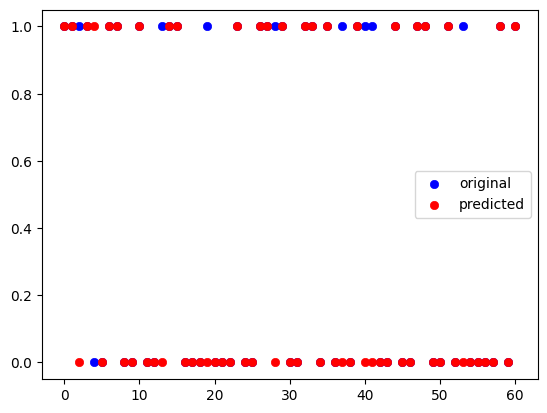

              precision    recall  f1-score   support

           0       0.79      0.97      0.87        31
           1       0.96      0.73      0.83        30

    accuracy                           0.85        61
   macro avg       0.87      0.85      0.85        61
weighted avg       0.87      0.85      0.85        61



In [206]:
logistic_regression_cv = LogisticRegressionCV(cv=10)
logistic_regression_cv.fit(X_train, y_train)

y_pred = logistic_regression_cv.predict(X_test)

score = logistic_regression_cv.score(X_test, y_test)
print('Score :', score)
squared_error = mean_squared_error(y_test, y_pred)
print('Mean Squared Error :',squared_error)
absolute_error = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error :',absolute_error)
results.append({'name': 'LogisticRegressionCV', 'score': score, 'SquaredError': squared_error, 'AbsoluteError': absolute_error})
x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, lw=0.5, color="blue", label="original")
plt.scatter(x_ax, y_pred, lw=0.5, color="red", label="predicted")
plt.legend()
plt.show()
print(classification_report(y_test, y_pred))

Score : 0.8524590163934426
Mean Squared Error : 0.14754098360655737
Mean Absolute Error : 0.14754098360655737


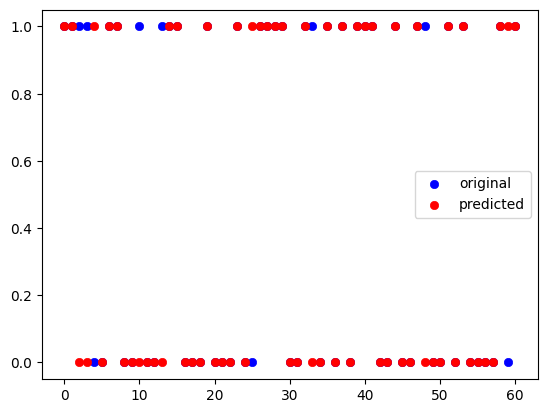

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        31
           1       0.89      0.80      0.84        30

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [207]:
sgd_classifier = SGDClassifier()
sgd_classifier.fit(X_train, y_train)

y_pred = sgd_classifier.predict(X_test)

score = sgd_classifier.score(X_test, y_test)
print('Score :', score)
squared_error = mean_squared_error(y_test, y_pred)
print('Mean Squared Error :',squared_error)
absolute_error = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error :',absolute_error)
results.append({'name': 'SGDClassifier', 'score': score, 'SquaredError': squared_error, 'AbsoluteError': absolute_error})
x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, lw=0.5, color="blue", label="original")
plt.scatter(x_ax, y_pred, lw=0.5, color="red", label="predicted")
plt.legend()
plt.show()
print(classification_report(y_test, y_pred))

Score : 0.4825007371814365
Mean Squared Error : 0.1293400468748358
Mean Absolute Error : 0.3007260643871723


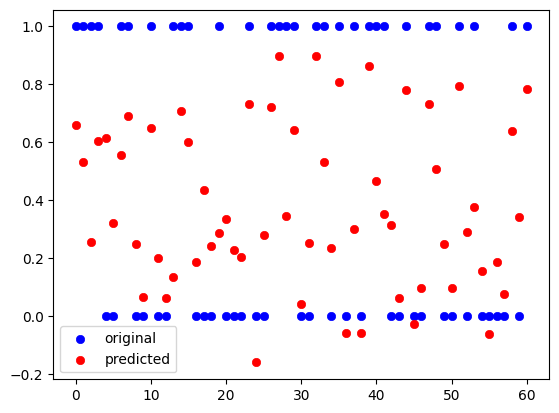

In [208]:
sgd_regressor = SGDRegressor()
sgd_regressor.fit(X_train, y_train)

y_pred = sgd_regressor.predict(X_test)
score = sgd_regressor.score(X_test, y_test)
print('Score :', score)
squared_error = mean_squared_error(y_test, y_pred)
print('Mean Squared Error :',squared_error)
absolute_error = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error :',absolute_error)
results.append({'name': 'SGDRegressor', 'score': score, 'SquaredError': squared_error, 'AbsoluteError': absolute_error})
x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, lw=0.5, color="blue", label="original")
plt.scatter(x_ax, y_pred, lw=0.5, color="red", label="predicted")
plt.legend()
plt.show()

In [209]:
results = pd.DataFrame(results)
results

,name,score,SquaredError,AbsoluteError
0,ElasticNet,0.111984,0.221944,0.466989
1,ElasticNetCV,0.452626,0.136807,0.316783
2,LogisticRegression,0.836066,0.163934,0.163934
3,LogisticRegressionCV,0.852459,0.147541,0.147541
4,SGDClassifier,0.852459,0.147541,0.147541
5,SGDRegressor,0.482501,0.129340,0.300726


Como conclusion el modelo que mejor performa es LogisticRegression con cross-validation o sin el ya que es el que mejor score obtiene y tiene el menor error absoluto. Ya que la regresión logística es un método estadístico que trata de modelar la probabilidad de una variable cualitativa binaria en función de una o más variables independientes. La principal aplicación de la regresión logística es la creación de modelos de clasificación binaria.